In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [518]:
#df = pd.concat((pd.read_csv('output.csv'), pd.read_csv('output_2.csv'), pd.read_csv('output_3.csv'), pd.read_csv('output_4.csv'), pd.read_csv('output_6.csv'))).reset_index(drop = True)
#df = df.drop_duplicates().reset_index(drop = True)
#df.to_csv('Итог', index = False)
#df

In [156]:
df = pd.read_csv('Итог')
df = df.drop_duplicates().reset_index(drop = True)
df

,Выигрышная ставка,Записей о продаже,VIN,Пробег,Дата аукциона,Двигатель,Цвет,Коробка передач,Топливо,Привод,Состояние,Место продажи,Стоимость ремонта,Рыночная стоимость,Документы,Тип повреждения,Основное повреждение,Второстепенное повреждение,Ключи,Кузов
0,$ 1 200 USD,1.0,ZACCJADT1GPD64789,155 535 mi(подтвержден),29.04.2024 19:00 UTC,2.4l 4,Черный,Автоматическая,Бензин,передний привод,улучшенные транспортные средства,"ADELANTO, CALIFORNIA",$ 11 107 USD,$ 11 625 USD,CA - SALVAGE CERTIFICATE,Столкновение,Повреждение передней части,Повреждение задней части,NaN,NaN
1,$ 600 USD,2.0,2FMDK38C78BA23860,156 784 mi(подтвержден),29.04.2024 19:00 UTC,3.5l 6,Серебряный,Автоматическая,Бензин,передний привод,заводится и едет,"WOODBURN, OREGON",$ 4 400 USD,$ 3 975 USD,OR - SALVAGE TITLE CERTIFICATE,Столкновение,Повреждение стороны,NaN,Ключи присутствуют,NaN
2,$ 6 200 USD,1.0,SJKCH5CP5KA007886,133 360 mi(подтвержден),29.04.2024 17:00 UTC,2.0l 4,Белый,Автоматическая,Бензин,передний привод,заводится и едет,"GRAND PRAIRIE, TEXAS",$ 14 726 USD,$ 16 425 USD,TX - SALVAGE VEHICLE TITLE,Столкновение,Повреждение стороны,NaN,Ключи присутствуют,NaN
3,$ 14 000 USD,1.0,KNDNC5H35P6300679,12 126 mi(подтвержден),29.04.2024 17:00 UTC,3.5l 6,Угольный,Автоматическая,Бензин,передний привод,заводится и едет,"GRAND PRAIRIE, TEXAS",$ 37 298 USD,$ 39 250 USD,TX - SALVAGE VEHICLE TITLE,Неизвестно,Повреждение передней части,NaN,Ключи присутствуют,NaN
4,$ 1 950 USD,1.0,5NPE34AF3FH225225,100 096 mi,29.04.2024 19:00 UTC,2.4l 4,Белый,Автоматическая,Бензин,передний привод,заводится и едет,"NORTH LAS VEGAS, NEVADA",$ 13 259 USD,$ 8 475 USD,NV - SALVAGE TITLE,Столкновение,Повреждение передней части,Повреждение стороны,Ключи присутствуют,4-дверный седан
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3222,$ 2 100 USD,1.0,2MEHM75W45X622184,94 765 mi(подтвержден),09.05.2024 18:00 UTC,4.6l 8,Зеленый,Автоматическая,Бензин,задний привод,заводится и едет,"ALBUQUERQUE, NEW MEXICO",$ 5 470 USD,$ 2 550 USD,NM - CERT OF TITLE-SALVAGE,Столкновение,Повреждение стороны,NaN,Ключи присутствуют,NaN
3223,$ 2 600 USD,1.0,5LTPW18566FJ04675,145 553 mi,09.05.2024 17:00 UTC,5.4l 8,Серый,Автоматическая,Бензин,4х4 с задним приводом,заводится и едет,"ELGIN, ILLINOIS",$ 9 572 USD,$ 7 075 USD,IL - SALVAGE CERTIFICATE,Столкновение,Повреждение передней части,Незначительная вмятина/царапины,Ключи присутствуют,NaN
3224,$ 400 USD,1.0,JT3GP10V9T7006181,193 861 mi(подтвержден),09.05.2024 19:00 UTC,2.0l 4,Белый,Автоматическая,Бензин,передний привод,заводится и едет,"COLTON, CALIFORNIA",$ 1 000 USD,$ 0 USD,CA - SALVAGE CERTIFICATE,Столкновение,Повреждение задней части,NaN,Ключи присутствуют,NaN
3225,$ 4 300 USD,1.0,SAJBE4BV2GCY09892,122 367 mi(подтвержден),09.05.2024 17:00 UTC,3.0l 6,Черный,Автоматическая,Бензин,задний привод,заводится и едет,"WILMER, TEXAS",$ 21 636 USD,$ 10 425 USD,TX - SALVAGE VEHICLE TITLE,Столкновение,Повсюду,NaN,Ключи присутствуют,NaN


# Предварительныя обработка

**Описание переменных:** 

* `Записей о продаже` —	количество попыток продажи ($2$ - первая продажа неудачная, вторая - удачная)
* `VIN` - индивидуальный шифр транспортного средства
* `Пробег` - пройденное автомобилем расстояние за весь период использования (в милях) + подтвержден ли пробег специалистами Copart
* `Дата аукциона` - дата продажи автомобиля
* `Двигатель` - переменная вида "{Литры}L {Цилиндры}" - характеристики двигателя
* `Цвет` - цвет автомобиля
* `Коробка передач` - вид коробки передач (механическая или автоматическая)
* `Топливо` - вид используемого топлива
* `Привод` - вид привода (полный, передний, задний, 4x4)
* `Состояние` - категорильная переменная, которая объединяет в себя 
    - наличие чистки 
    - возможность машины ехать 
    - запуск двигателя
* `Место продажи` - город и штат продажи
* `Стоимость ремонта` - стоимость проведенного для восстановления после повреждения машины ремонта
* `Рыночная стоимость` - оценочная розничная стоимость - Это примерная рыночная стоимость лота по оценке продавца, который продал транспортное средство Copart
* `Документы` - (тип права собственности/тип техпаспорта) — это документы на право владения, которые будут переданы участнику
* `Тип повреждения` - что привело к повреждению -> продаже на аукционе
* `Основное повреждение` - вид главного повреждения
* `Второстепенное повреждение` - вид второго повреждения (NaN - если его нет)
* `Ключи` - указывает, имеются ли у компании Copart ключи от автомобиля
* `Кузов` - вид кузова (NaN - если его нет)

**Целевая переменная:** `Выигрышная ставка` — цена продажи на аукционе (в долларах)

Ссылка на доп объяснение: https://www.copart.com/ru/Content/us/ru/Support/FAQ-Topics/Common-Terms

## Приведение данных в единый вид и формирование новых признаков

__Перевод на английский язык:__ Так как часть данных представлена на русском, часть - на английском языке, было решено перевести данные на английский с использованием терминов оригинального аукциона - Copart. С помощью перевода в истинные термины также были устранены проблемы с некорректным переводом сайта, с которого парсили данные.

In [157]:
def engine(x:str) -> float:
    """
    Функция для формирования признака "Литры"
    :param x: str - значение признака "Двигатель"
    :return: число -- значения литров
    """
    if pd.isna(x):
        return x
    elif 'L' not in x and 'l' not in x:
        return np.NaN
    elif 'L' in x:
        return float(x.split()[0])
    elif 'l' in x:
        return float(x.split()[0][:-1])
    else:
        return x
    
def color(x:str) -> str:
    """
    Функция для перевода в английский признака "Цвет"
    :param x: str - значение признака "Цвет"
    :return: str
    """
    if x == 'Черный':
        return 'Black'
    elif x == 'Серебряный':
        return 'Silver'
    elif x == 'Белый':
        return 'White'
    elif x == 'Угольный':
        return 'Charcoal'
    elif x == 'Синий':
        return 'Blue'
    elif x == 'Золотой':
        return 'Gold'
    elif x == 'Серый':
        return 'Grey'
    elif x == 'Зеленый':
        return 'Green'
    elif x == 'Желтый':
        return 'Yellow'
    elif x == 'Темно-бордовый':
        return 'Maroon'
    elif x == 'Красный':
        return 'Red'
    elif x == 'Бордовый':
        return 'Burgundy'
    elif x == 'Коричневый':
        return 'Brown'
    elif x == 'Желто-коричневый':
        return 'Yellow-brown'
    elif x == 'Бежевый':
        return 'Beige'
    elif x == 'Оранжевый':
        return 'Orange'
    elif x == 'Бирюзовый':
        return 'Turquoise'
    elif x == 'Двухцветный':
        return 'Two-color'
    elif x == 'Фиолетовый':
        return 'Purple'
    elif x == 'Розовый':
        return 'Pink'
    elif x == 'Кремовый':
        return 'Cream'
    else:
        return x   
    
def transmission(x:str) -> str:
    """
    Функция для перевода в английский признака "Коробка передач"
    :param x: str - значение признака "Коробка передач"
    :return: str
    """
    if x == 'Автоматическая':
        return 'Automatic'
    elif x == 'Механическая':
        return 'Manual'
    else:
        return x
    
def fuel(x:str) -> str:
    """
    Функция для перевода в английский признака "Топливо"
    :param x: str - значение признака "Топливо"
    :return: str
    """
    if x == 'Бензин':
        return 'Flexible Fuel' #Petrol
    elif x == 'Этанолосодержащий бензин':
        return 'Ethenol Flex Fuel'
    elif x == 'Гибрид':
        return 'Hybrid'
    elif x == 'Дизель':
        return 'Diesel'
    elif x == 'Электричество':
        return 'Electric'
    elif x == 'Сжатый природный газ':
        return 'Compressed Natural Gas'
    else:
        return x
    
def Drive_Train(x:str) -> str:
    """
    Функция для перевода в английский признака "Привод"
    :param x: str - значение признака "Привод"
    :return: str
    """
    if pd.isna(x):
        return x
    else:
        x = x.lower()
        if x == 'передний привод':
            return 'Front-wheel Drive'
        elif x == 'задний привод':
            return 'Rear-wheel Drive'
        elif x == 'полный привод':
            return 'All Wheel Drive'
        elif x == '4х4 с передним приводом':
            return '4x4 w/front Whl Drv'
        elif x == '4х4 с задним приводом':
            return '4x4 w/rear Whl Drv'
        elif x == '4x4':
            return 'Four by Four'
        else:
            return x
        
def vehicle_condition_type(x:str) -> str:
    """
    Функция для перевода в английский признака "Основное повреждение"
    :param x: str - значение признака "Основное повреждение"
    :return: str
    """
    if x == 'Повреждение передней части':
        return 'Front End'
    elif x == 'Повреждение стороны':
        return 'Side'
    elif x == 'Повреждение задней части':
        return 'Rear End'
    elif x == 'Повсюду':
        return 'All Over'
    elif x == 'Вода/Наводнение':
        return 'Water/Flood'
    elif x == 'Незначительная вмятина/царапины':
        return 'Minor Dents/Scratches'
    elif x == 'Вандализм':
        return 'Vandalism'
    elif x == 'Повреждение ходовой части':
        return 'Undercarriage'
    elif x == 'Град':
        return 'Hail'
    elif x == 'Механическое повреждение': 
        return 'Mechanical'
    elif x == 'Повреждение рамы':
        return 'Frame Damage Reported'
    elif x == 'Опрокидывание/Перевертышь': 
        return 'Rollover'
    elif x == 'Нормальный износ':
        return 'Normal Wear'
    elif x == 'Пожар':
        return 'Burn'
    elif x == 'Верх/крыша':
        return 'Top/Roof'
    elif x == 'Пожар двигателя':
        return 'Burn - Engine'
    elif x == 'Отсутствует/Изменен VIN':
        return 'Missing/Altered VIN'
    elif x == 'Биологическая/Химическая опасность':
        return 'Biohazardous/Chemical'
    elif x == 'Частичный ремонт':
        return 'Partial/Incomplete Repair'
    elif x == 'История повреждений':
        return 'Damage History'
    elif x == 'Отказ в ремонте':
        return 'Rejected Repair'
    elif x == 'Разукомплектовано':
        return 'Stripped'
    elif x == 'Неизвестно':
        return 'Unknown'
    else:
        return x
    
body_style = {
    '4-дверный седан': 'Sedan 4d',
    'хэтчбек': 'Hatchbac',
    '4-дверный спорт': '4dr Spor',
    'кабриолет':'Converti',
    'спортивная версия': 'Sports V',
    '4-дверный удлиненный': '4dr Ext',
    'пожарная машина': 'Fire Tru',
    'пикап экипажа':  'Crew Cha',
    'клубное такси': 'Club Cap',
    'купе': 'Coupe',
    'подбирать': 'Pickup',
    '2 двери спорт': '2dr Spor',
    '3-х дверное купе': 'Coupe 3d', 
    'грузовой фургон': 'Cargo Va',
    'обычная кабина': 'Tilt Cab', 
    'стационарный (неподвижный)': 'Station', 
    'расширенный': 'Extended',
    '3-дверный удлиненный': '3dr Ext', 
    'шасси': 'Chassis', 
    'спортивный пикап': 'Sports Pi',
    'трактор': 'Tractor'
}

vehicle_conition = {
    'улучшенные транспортные средства': 'Enhanced Transport',
    'заводится и едет': 'Run and Drive',
    'двигатель запускается': 'Engine Start Program'
}

damage_type = {
    'Столкновение': 'Collision',
    'Неизвестно': 'Unknown',
    'Кража': 'Theft',
    'Вода/Наводнение': 'Water/Flood',
    'Вандализм': 'Vandalism',
    'Град': 'Hail',
    'Дилерские услуги Copart': 'Dealer Services',
    'Аренда': 'Rent',
    'Материальный ущерб': 'Material damage', 
    'Изьятие': 'Seizure',
    'Конфискат': 'Confiscation',
    'Пожертвование': 'Donation',
    'Диллерский коносамент': 'Dealer Bill of Lading',
    'Публичный коносамент': 'Public bill of lading',
    'Пожар': 'Fire',
    'Ураган': 'Hurricane',
    'Незастрахованное авто': 'Uninsured car', 
    'Катастрофа': 'Catastrophe'
}

In [158]:
#перевод в числа, избавление от знака долларов
df['Выигрышная ставка'] = df['Выигрышная ставка'].apply(lambda x: int(''.join(x.split()[1:-1])))

#Формирование новой переменной из исходной переменной 'Пробег' - "Подтвержденность пробега"
df['Подтвержденность пробега'] = df['Пробег'].apply(lambda x: 1 if 'подтвержден' in str(x) else 0)

#Удаление данные о подтвержденности пробега из исходной переменной 'Пробег' и перевод в числа
df['Пробег'] = df['Пробег'].apply(lambda x: float(''.join(str(x).split()[:-1])) if not pd.isna(x) else np.NaN)

#перевод в тип datetime
df['Дата аукциона'] = pd.to_datetime(df['Дата аукциона'], dayfirst=True)

#Формирование новой переменной из исходной переменной 'Двигатель'. Исходная переменная имеет вид '{Литры}L {Цилиндры}'
#В качестве новой переменной использовались данные из переменной 'Двигатель' о цилиндрах + перевод в числа
df['Цилиндры'] = df['Двигатель'].apply(lambda x: x.split()[-1] if not pd.isna(x) else x)

#В качестве новой переменной использовались данные из переменной 'Двигатель' о литрах + перевод в числа
df['Литры'] = df['Двигатель'].apply(engine)

#удаление объектов без нужных данных о литрах и цилиндрах
df = df.drop(df[df['Цилиндры'] == 'U'].index, axis = 0)
df = df.drop(df[df['Цилиндры'] == 'R'].index, axis = 0)

#удаление исходной переменной
df = df.drop('Двигатель', axis = 1)

In [159]:
#удаление объектов без указанного пробега
df = df.dropna(subset = ['Пробег'])
df = df.reset_index(drop = True)

In [160]:
#перевод цвета на английский язык - приведение в унифицированный вид
df['Цвет'] = df['Цвет'].apply(color)

#Возврат терминов к исходным - тем, которые используются на Copart
df['Коробка передач'] = df['Коробка передач'].apply(transmission)
df['Топливо'] = df['Топливо'].apply(fuel)
df['Привод'] = df['Привод'].apply(Drive_Train)

#Формирование новых переменных из исходной переменной 'Место продажи' - "Штат" и "Город"
df['Штат'] = df['Место продажи'].apply(lambda x: x.split()[-1].capitalize())
df['Город'] = df['Место продажи'].apply(lambda x: x.split(',')[0].capitalize())
df = df.drop('Место продажи', axis = 1)

#перевод в числа, избавление от знака долларов
df['Стоимость ремонта'] = df['Стоимость ремонта'].apply(lambda x: int(''.join(x.split()[1:-1])))
df['Рыночная стоимость'] = df['Рыночная стоимость'].apply(lambda x: int(''.join(x.split()[1:-1])))

#Возврат терминов к исходным - тем, которые используются на Copart
df['Основное повреждение'] = df['Основное повреждение'].apply(vehicle_condition_type)
df['Второстепенное повреждение'] = df['Второстепенное повреждение'].apply(lambda x: 'No' if pd.isna(x) else vehicle_condition_type(x))
df['Тип повреждения'] = df['Тип повреждения'].apply(lambda x:x if pd.isna(x) else damage_type[x])

#Формирование бинарной переменной из исходной
df['Ключи'] = df['Ключи'].apply(lambda x: 0 if pd.isna(x) else 1) #Если есть - 1

#Замена NaN на категорию, означающую отсутсвие кузова + возврат терминов к исходным - тем, которые используются на Copart
df['Кузов'] = df['Кузов'].apply(lambda x:  'No' if pd.isna(x) else  body_style[x])

df['Состояние'] = df['Состояние'].apply(lambda x: x if pd.isna(x) else vehicle_conition[x])

#Формирование новых переменных из исходной переменной "Состояние" - переменная о наличии чистки (бинарная)
df['Чистка'] = df['Состояние'].apply(lambda x: 1 if x == 'Enhanced Transport' else 0)
#Формирование новых переменных из исходной переменной "Состояние" - переменная о возможности машины ехать (бинарная)
df['Едет'] = df['Состояние'].apply(lambda x: 1 if x == 'Run and Drive' else 0)
#Формирование новых переменных из исходной переменной "Состояние" - переменная о возможности запуска двигателя (бинарная)
df['Запуск двигателя'] = df['Состояние'].apply(lambda x: 1 if x == 'Run and Drive' or x == 'Engine Start Program' else 0)
df = df.drop('Состояние', axis = 1).reset_index(drop = True)

df = df.rename(columns={"Документы": "Техпаспорт"})

__Оставшиеся пропуски:__ 
* `Коробка передач` - так как данные не предоставлены, заполнить модой было бы неверно, так как она может также не присутствовать в машине
* `Привод` - категориальная переменная. Модой заполнить пропуски кажется некорректным, так как машина может быть по-разному укомплектована
* `Литры` - переменная представлена в числовом виде, однако двигатели обычно имеют стандартный набор возможных литров (похоже на категориальную). При этом если посмотреть нв отдельные наблюдения с пропусками, там могут быть мотоциклы, литры двигателей которых сильно отличаются от двигателей автомобилей

Поэтому все оставшиеся пропуски удаляются

In [161]:
df = df.dropna(subset = ['Коробка передач', 'Привод', 'Литры'])

In [162]:
df.shape

(2790, 25)

## Итоговое описание сформированного датасета

**Описание переменных:** 

* `Записей о продаже` —	количество попыток продажи ($2$ - первая продажа неудачная, вторая - удачная)
* `VIN` - индивидуальный шифр транспортного средства
* `Пробег` - пройденное автомобилем расстояние за весь период использования (в милях)
* `Подтвержденность пробега` - подтвержден ли указанный пробег экспертами или нет (бинарная переменная: $1$ - подтвержден)
* `Дата аукциона` - дата продажи автомобиля
* `Цвет` - цвет автомобиля
* `Коробка передач` - вид коробки передач (механическая или автоматическая)
* `Топливо` - вид используемого топлива
* `Привод` - вид привода (полный, передний, задний, 4x4)
* `Стоимость ремонта` - стоимость проведенного для восстановления после повреждения машины ремонта
* `Рыночная стоимость` - оценочная розничная стоимость - Это примерная рыночная стоимость лота по оценке продавца, который продал транспортное средство Copart
* `Техпаспорт` - (тип права собственности) — это документы на право владения, которые будут переданы участнику
* `Тип повреждения` - что привело к повреждению -> продаже на аукционе
* `Основное повреждение` - вид главного повреждения
* `Второстепенное повреждение` - вид второго повреждения (Nо - если его нет)
* `Ключи` - указывает, имеются ли у компании Copart ключи от автомобиля
* `Кузов` - вид кузова ($No$ - если его нет)
* `Подтвержденность пробега` - подтвержден ли экспертам Copart пробег автомобиля (бинарная переменная)($1$ - подтвержден)
* `Цилиндры` - характеристика двигателя
* `Литры` - характеристика двигателя
* `Штат` -  штат продажи
* `Город` - город продажи
* `Чистка` - проверили ли эксперты дополнительные работы по приведению автомобиля в товарный вид (мойка, чистка, нанесение защитного покрытия...). Бинарная переменная ($1$ - чистка проведена)
* `Едет` - переменная показывает, может ли машина ехать. Бинарная переменная ($1$ - машина может ехать)
* `Запуск двигателя` - запускается ли двигатель. Бинарная переменная ($1$ - двигатель запускается)

**Целевая переменная:** `Выигрышная ставка` — цена продажи на аукционе (в долларах)

# Визуализация

In [163]:
df = df.set_index('VIN')

In [164]:
var_cat = np.array(['Цвет', 'Коробка передач', 'Топливо', 'Привод', 'Техпаспорт', 'Тип повреждения', 'Основное повреждение', 
           'Второстепенное повреждение', 'Ключи', 'Кузов', 'Подтвержденность пробега', 'Цилиндры', 'Штат', 'Город', 'Чистка', 
          'Едет', 'Запуск двигателя', 'Записей о продаже'])

var_real = np.array(['Литры', 'Пробег', 'Стоимость ремонта', 'Рыночная стоимость'])

var_datetime = np.array(['Дата аукциона'])

target = 'Выигрышная ставка'

## Распределение целевой переменной

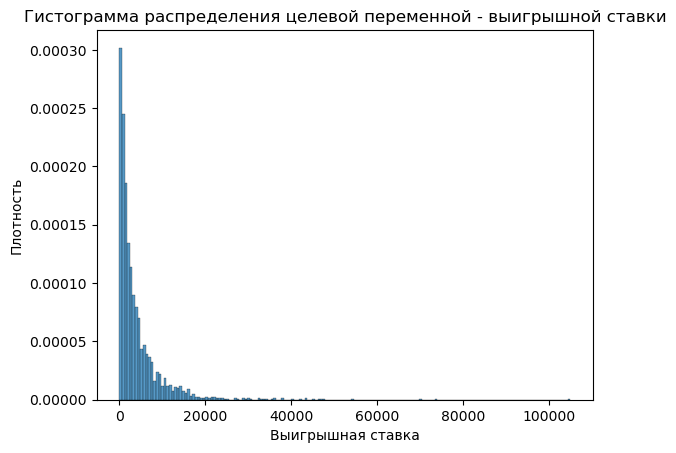

In [403]:
sns.histplot(df[target], stat = 'density')
plt.title('Гистограмма распределения целевой переменной - выигрышной ставки')
plt.ylabel('Плотность');

__Небольшой вывод:__ Заметно, что в данных очень много выбросов, поэтому нужно посмотреть на сглаженные данные (возьмем логарифм целевой переменной)

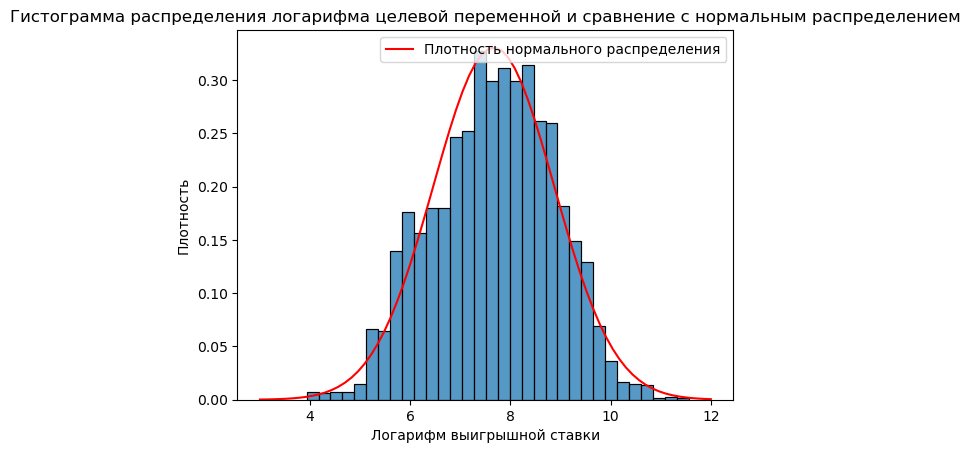

In [405]:
mean = df[target].apply(lambda x: np.log(1 + x)).mean()
std = df[target].apply(lambda x: np.log(1 + x)).std()
t = np.linspace(3, 12, 70)
y = stats.norm(loc = mean, scale = std).pdf(t)
sns.lineplot(x = t, y = y, label = 'Плотность нормального распределения', color = 'red')
sns.histplot(df[target].apply(lambda x: np.log(1 + x)), stat = 'density')
plt.legend()
plt.title('Гистограмма распределения логарифма целевой переменной и сравнение с нормальным распределением')
plt.xlabel('Логарифм выигрышной ставки')
plt.ylabel('Плотность');

__Небольшой вывод:__ Распределение переменной - логарифм выигрышной ставки - сильно похоже на нормальное распределение. Хвосты маленькие, выбросов нет.

## Непрерывные переменные

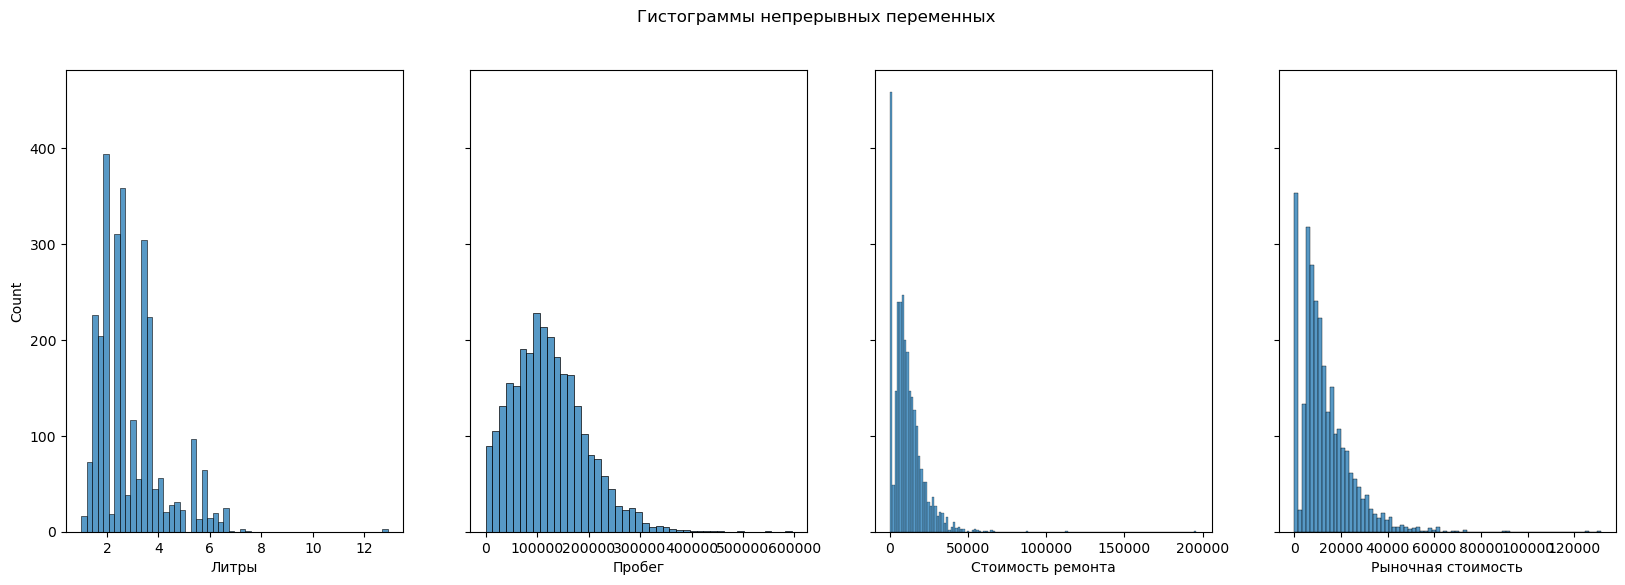

In [467]:
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(20, 6))
fig.suptitle('Гистограммы непрерывных переменных')
for i in range(0, 4):
    sns.histplot(df[var_real[i]], ax = axs[i])

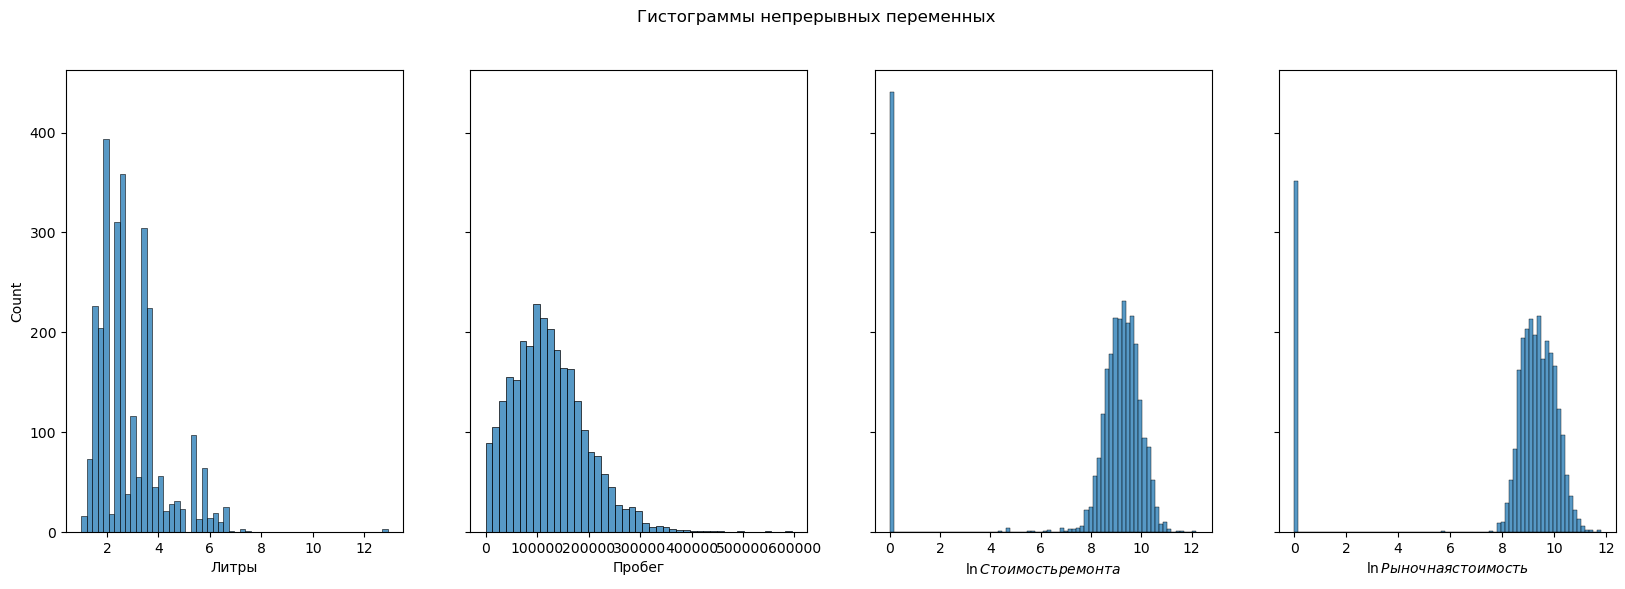

In [472]:
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(20, 6))
fig.suptitle('Гистограммы непрерывных переменных')
for i in range(0, 2):
    sns.histplot(df[var_real[i]], ax = axs[i])
for i in range(2, 4):
    sns.histplot(df[var_real[i]].apply(lambda x: np.log(1 + x)), ax = axs[i])
    axs[i].set_xlabel(f'$ \ln{var_real[i]}$')

## Корреляция вещественных переменных с таргетом

In [11]:
df['Логарифм таргета'] = df[target].apply(lambda x: np.log(1 + x))

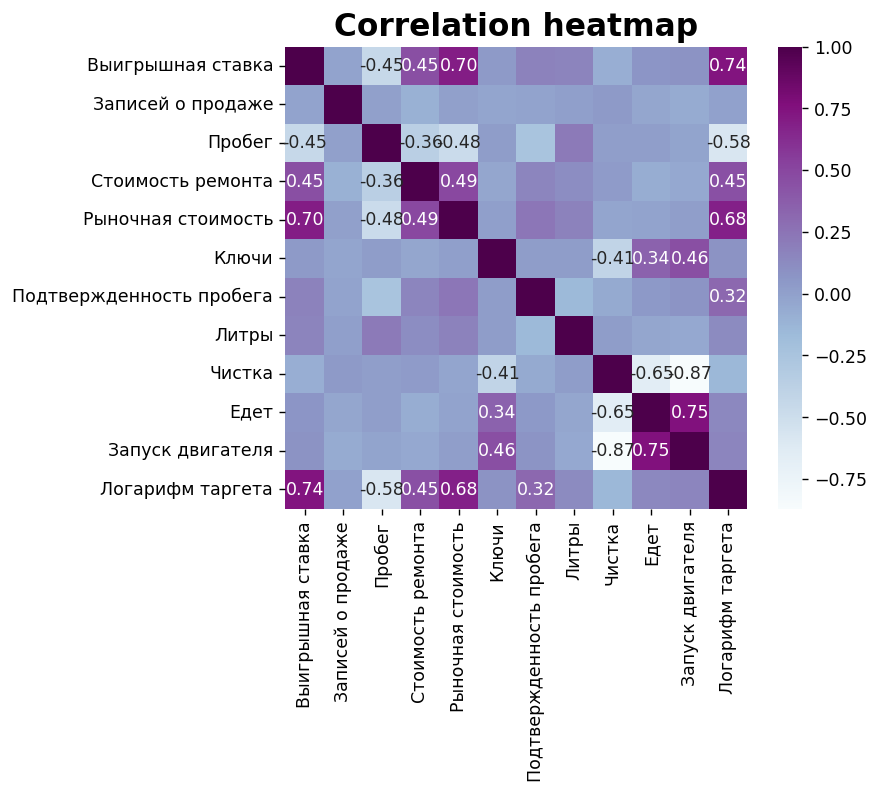

In [57]:
plt.figure(dpi=125)
ax = sns.heatmap(df.corr(numeric_only= True), cmap="BuPu", annot=True, fmt="0.2f", square = True)
plt.title('Correlation heatmap', fontsize=18, fontweight="bold")
for t in ax.texts:
    if (float(t.get_text()) >= 0.3 or float(t.get_text()) <= -0.3) and t.get_position()[0] != t.get_position()[1]:
        t.set_text(t.get_text())
    else:
        t.set_text("")

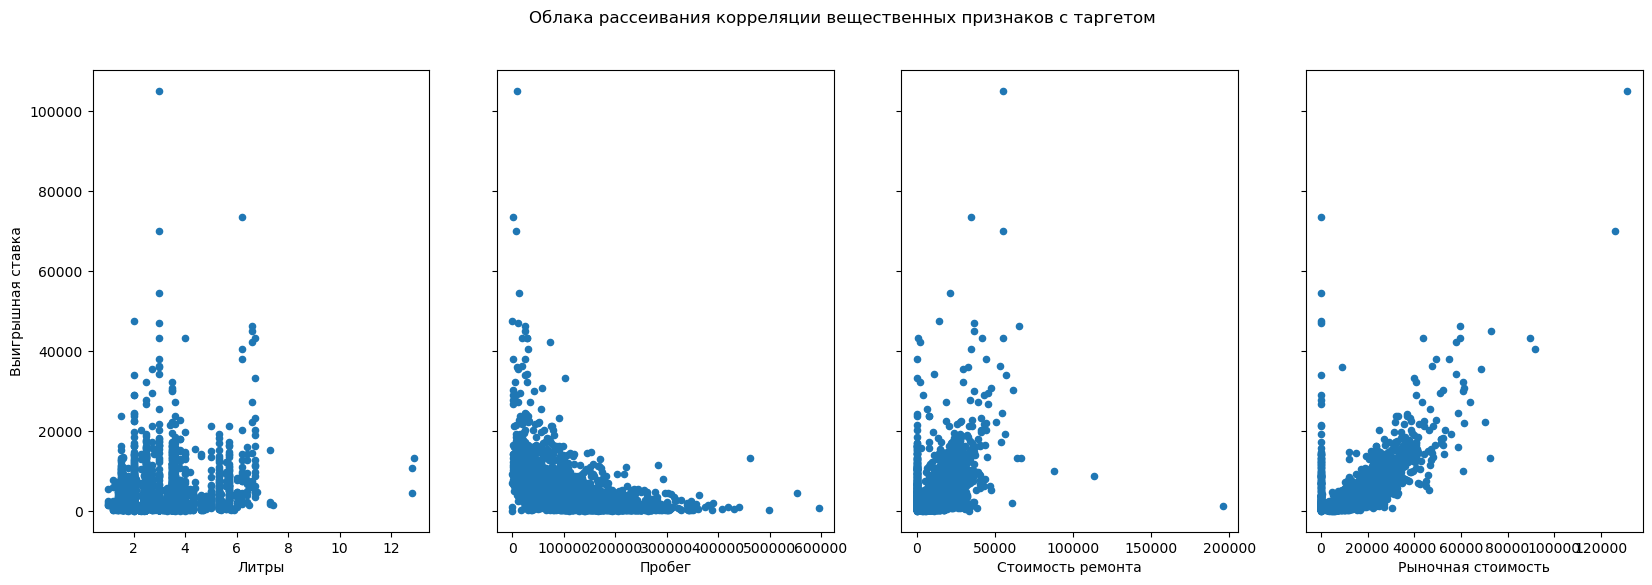

In [411]:
fig, axs = plt.subplots(1, var_real.shape[0], sharey=True)
df.plot(kind='scatter', x=var_real[0], y=target, ax=axs[0], figsize=(20, 6))
df.plot(kind='scatter', x=var_real[1], y=target, ax=axs[1])
df.plot(kind='scatter', x=var_real[2], y=target, ax=axs[2])
df.plot(kind='scatter', x=var_real[3], y=target, ax=axs[3])

#fig.supylabel('Target')
fig.suptitle('Облака рассеивания корреляции вещественных признаков с таргетом');

__Небольшой вывод:__ Автомобили с нулевой рыночной стоимостью можно назвать металлоломом, так как они используются скорее на запчасти, а не как цельный автомобиль. Связь же более пригодных к использованию автомобилей сильно похожа на линейную

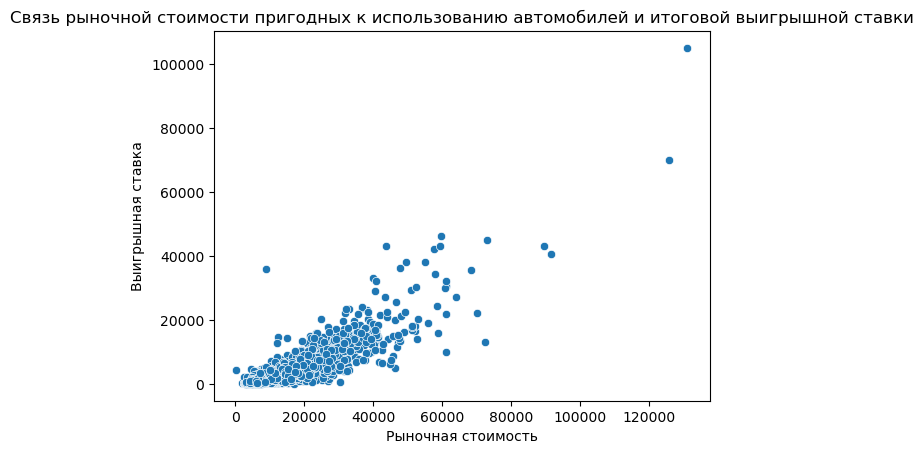

In [417]:
sns.scatterplot(x = df[df['Рыночная стоимость'] != 0]['Рыночная стоимость'], y = df['Выигрышная ставка'])
plt.title('Связь рыночной стоимости пригодных к использованию автомобилей и итоговой выигрышной ставки');

## Корреляция вещественных переменных с логарифмом таргета

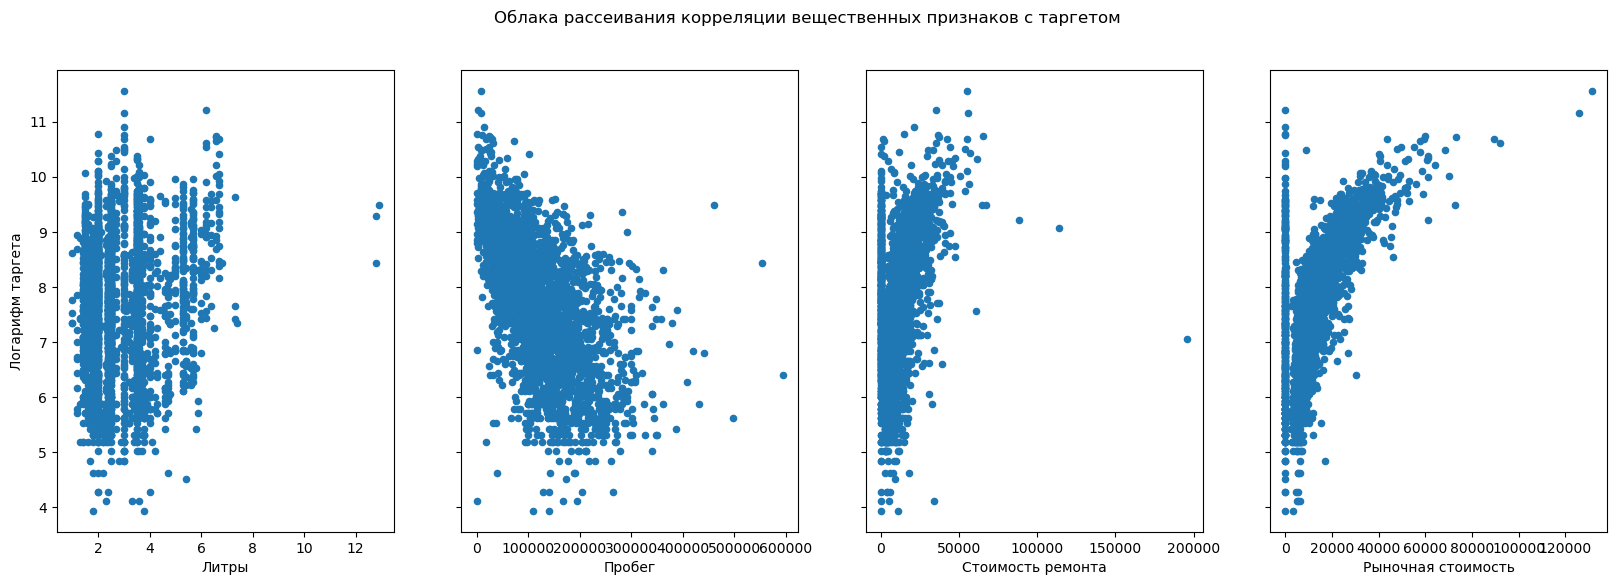

In [440]:
fig, axs = plt.subplots(1, var_real.shape[0], sharey=True)
df.plot(kind='scatter', x=var_real[0], y='Логарифм таргета', ax=axs[0], figsize=(20, 6))
df.plot(kind='scatter', x=var_real[1], y='Логарифм таргета', ax=axs[1])
df.plot(kind='scatter', x=var_real[2], y='Логарифм таргета', ax=axs[2])
df.plot(kind='scatter', x=var_real[3], y='Логарифм таргета', ax=axs[3])

#fig.supylabel('Target')
fig.suptitle('Облака рассеивания корреляции вещественных признаков с логарифмом таргетом');

## Поиск зависимостей

### Рыночная стоимость 

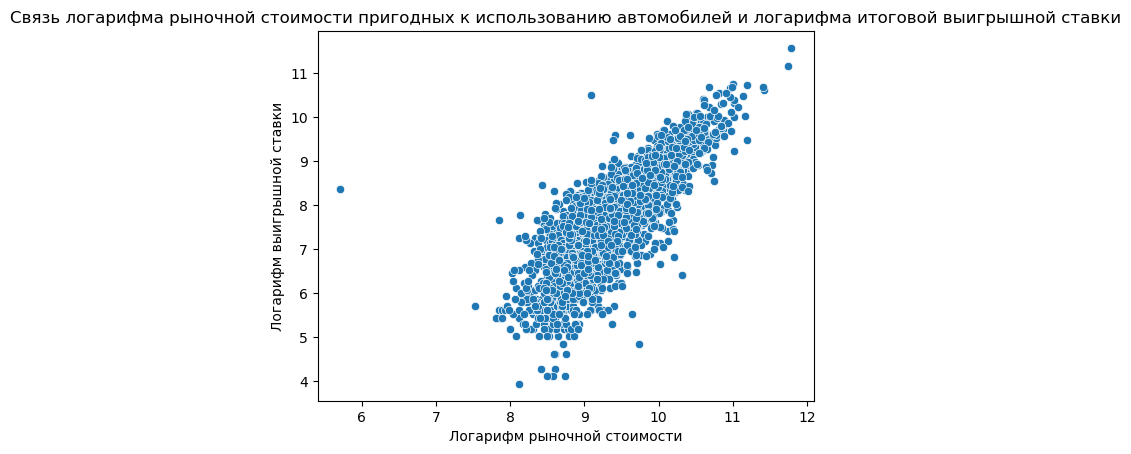

In [446]:
sns.scatterplot(x = df[df['Рыночная стоимость'] != 0]['Рыночная стоимость'].apply(lambda x: np.log(1 + x)), y = df['Логарифм таргета'])
plt.ylabel('Логарифм выигрышной ставки')
plt.xlabel('Логарифм рыночной стоимости')
plt.title('Связь логарифма рыночной стоимости пригодных к использованию автомобилей и логарифма итоговой выигрышной ставки');

### Стоимость ремонта

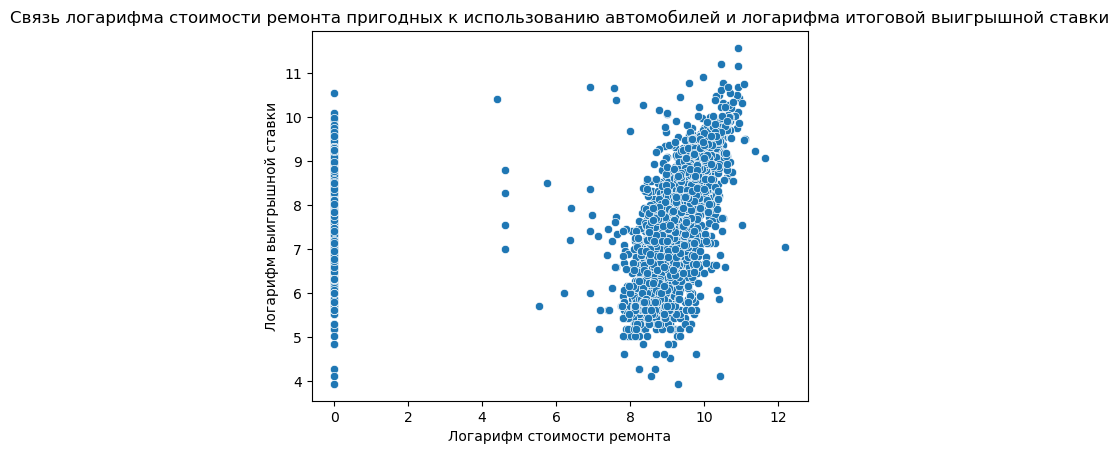

In [451]:
sns.scatterplot(x = df['Стоимость ремонта'].apply(lambda x: np.log(1 + x)), y = df['Логарифм таргета'])
plt.ylabel('Логарифм выигрышной ставки')
plt.xlabel('Логарифм стоимости ремонта')
plt.title('Связь логарифма стоимости ремонта пригодных к использованию автомобилей и логарифма итоговой выигрышной ставки');

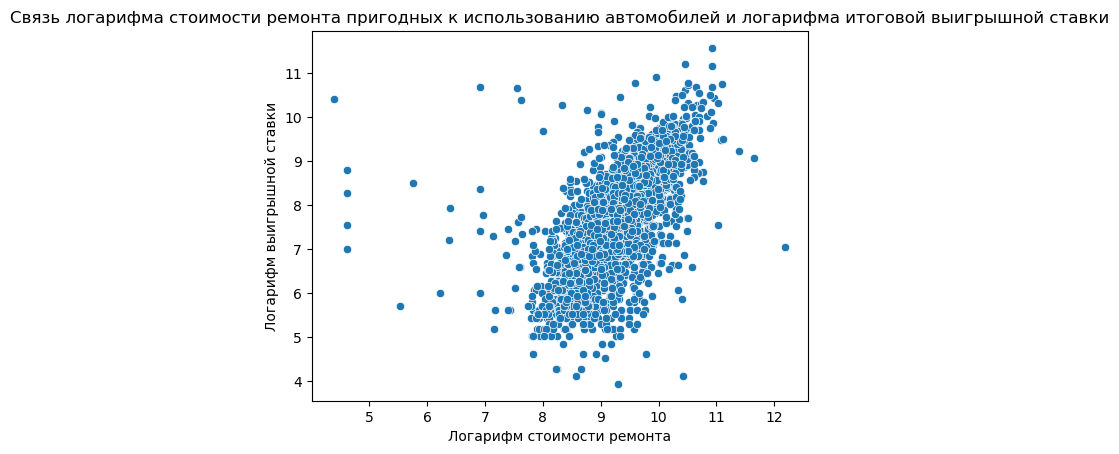

In [449]:
sns.scatterplot(x = df[df['Стоимость ремонта'] != 0]['Стоимость ремонта'].apply(lambda x: np.log(1 + x)), y = df['Логарифм таргета'])
plt.ylabel('Логарифм выигрышной ставки')
plt.xlabel('Логарифм стоимости ремонта')
plt.title('Связь логарифма стоимости ремонта пригодных к использованию автомобилей и логарифма итоговой выигрышной ставки');

### Пробег

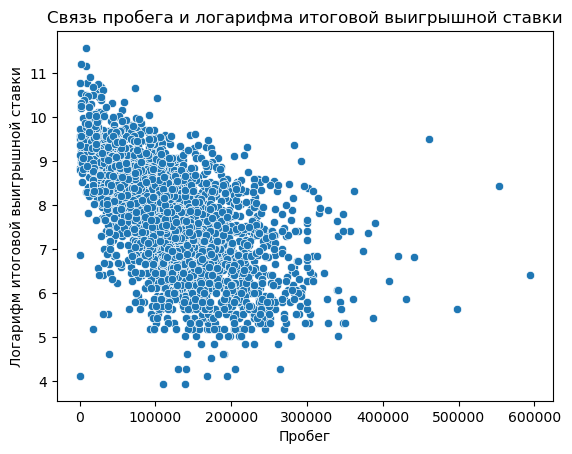

In [13]:
sns.scatterplot(x = df['Пробег'], y = df['Логарифм таргета'])
plt.ylabel('Логарифм итоговой выигрышной ставки')
plt.xlabel('Пробег')
plt.title('Связь пробега и логарифма итоговой выигрышной ставки');

In [460]:
df[var_real].corrwith(df['Логарифм таргета'])

Литры                 0.124118
Пробег               -0.580494
Стоимость ремонта     0.451372
Рыночная стоимость    0.681093
dtype: float64

In [463]:
df[df['Рыночная стоимость']!=0]['Рыночная стоимость'].apply(lambda x: np.log(1 + x)).corr(df['Логарифм таргета'])

0.8253818255476929

__Вывод:__ Обнаружена линейная связь переменных пробега, логарифма стоимости ремонта и логарифма рыночной стоимости от логарифма от выигрышной ставки.
* С пробегом наблюдается отрицательная связь: чем меньше пробег, тем больше стоит автомобиль
* Больше всего связь с логарифмом рыночной стоимости для машин, которые пригодны к дальнейшему использованию - корреляция равна 0.8 -> заметна линейная зависимость

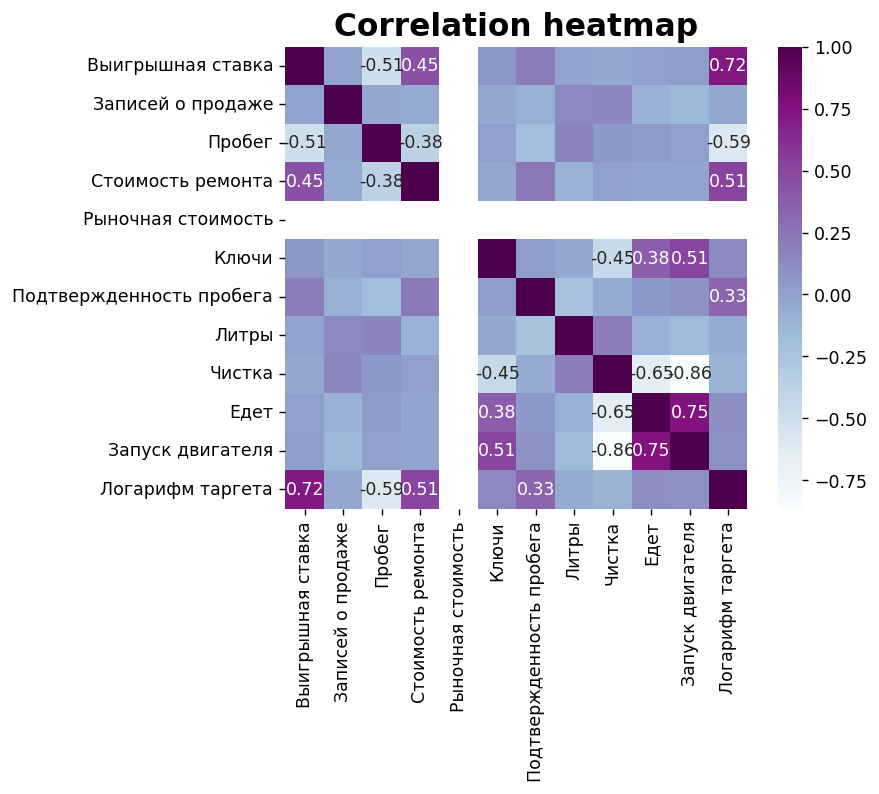

In [107]:
# Исследуем отдельно автомобили с нулевой рыночной стоимостью
plt.figure(dpi=125)
ax = sns.heatmap(df[(df['Рыночная стоимость']==0)].corr(numeric_only= True), cmap="BuPu", annot=True, fmt="0.2f", square = True)
plt.title('Correlation heatmap', fontsize=18, fontweight="bold")
for t in ax.texts:
    if (float(t.get_text()) >= 0.3 or float(t.get_text()) <= -0.3) and t.get_position()[0] != t.get_position()[1]:
        t.set_text(t.get_text())
    else:
        t.set_text("")

__Небольшой вывод__: никаких дополнительных связей между нулевой рыночной стоимостью и другими переменными не обнаружено

In [17]:
df[df['Рыночная стоимость']!=0]['Рыночная стоимость'].corr(df[df['Стоимость ремонта'] != 0]['Стоимость ремонта'])

0.7186633879224313

## Категориальные переменные

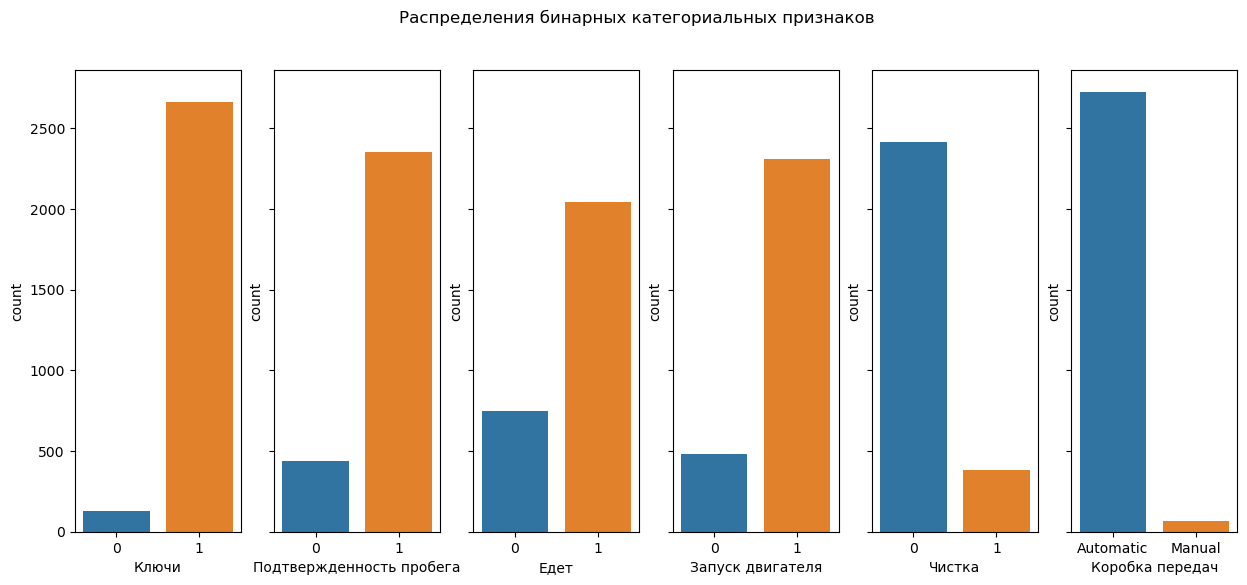

In [498]:
var_analysis = np.array(['Ключи', 'Подтвержденность пробега', 'Едет', 'Запуск двигателя', 'Чистка', 'Коробка передач'])
fig, axs = plt.subplots(1, var_analysis.shape[0], sharey=True, figsize=(15, 6))
for i in range(len(var_analysis)):
    sns.countplot(df, x = var_analysis[i], ax = axs[i])

fig.suptitle('Распределения бинарных категориальных признаков');

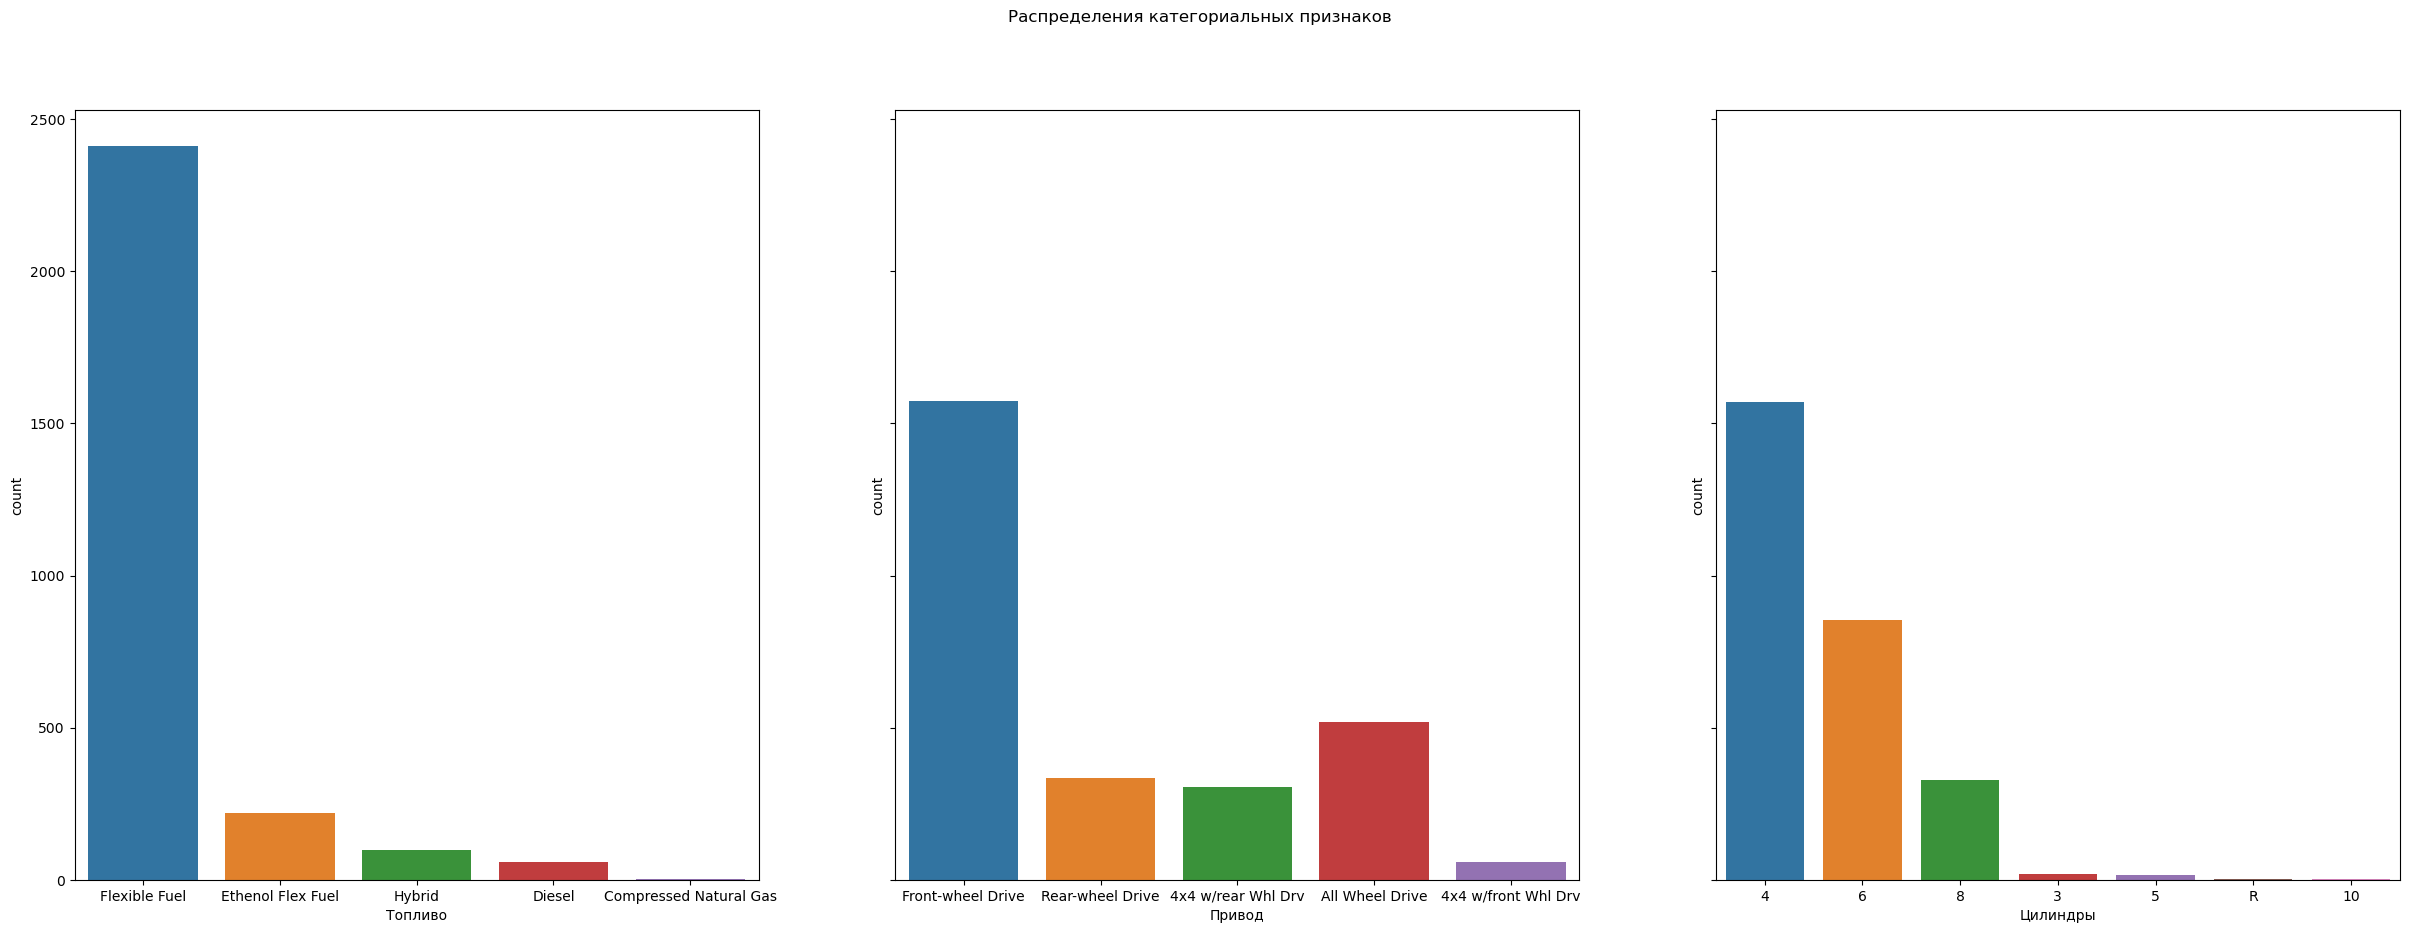

In [504]:
var_analysis = np.array(['Топливо', 'Привод', 'Цилиндры'])
fig, axs = plt.subplots(1, var_analysis.shape[0], sharey=True, figsize=(30, 10))
for i in range(len(var_analysis)):
    sns.countplot(df, x = var_analysis[i], ax = axs[i])

fig.suptitle('Распределения категориальных признаков');

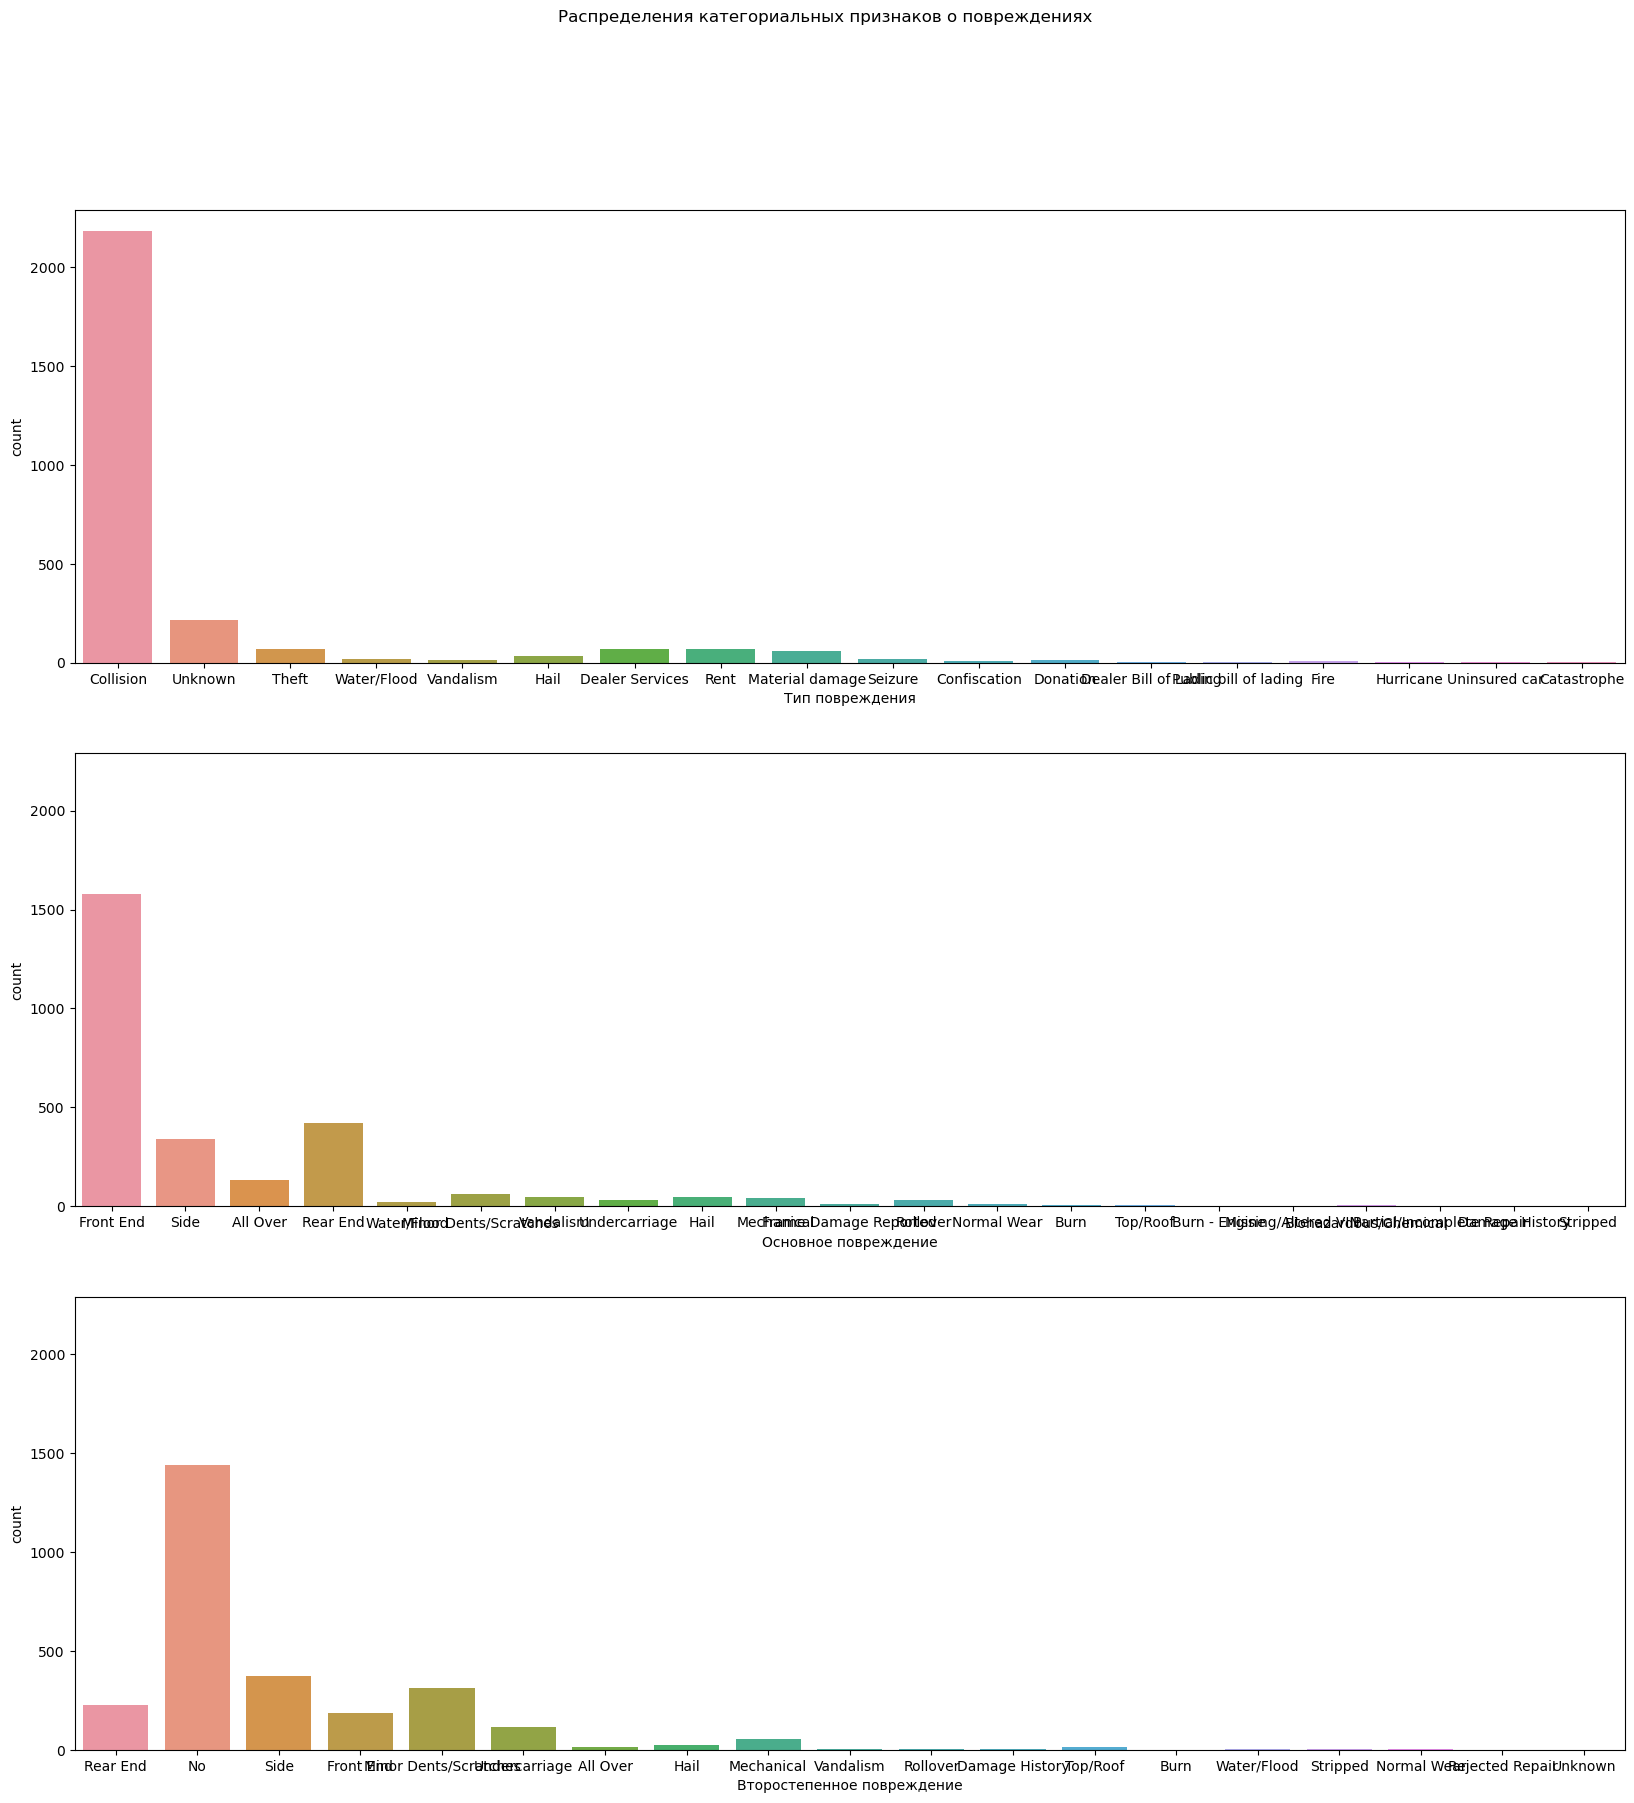

In [508]:
var_analysis = np.array(['Тип повреждения', 'Основное повреждение', 'Второстепенное повреждение'])
fig, axs = plt.subplots(var_analysis.shape[0], 1, sharey=True, figsize=(20, 20))
for i in range(len(var_analysis)):
    sns.countplot(df, x = var_analysis[i], ax = axs[i])


#fig.supylabel('Target')
fig.suptitle('Распределения категориальных признаков о повреждениях');

## Корреляция категорильных переменных с таргетом

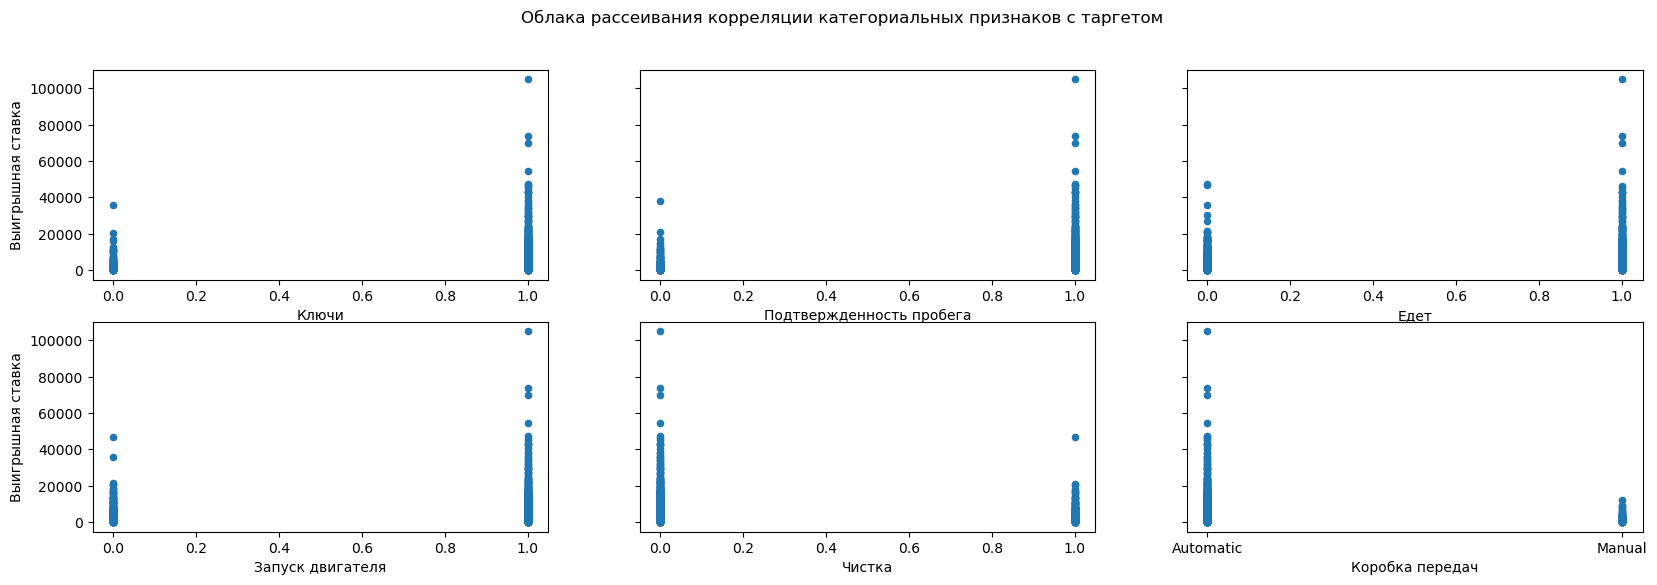

In [509]:
var_analysis = np.array(['Ключи', 'Подтвержденность пробега', 'Едет', 'Запуск двигателя', 'Чистка', 'Коробка передач'])
fig, axs = plt.subplots(2, 3, sharey=True)    
df.plot(kind='scatter', x=var_analysis[0], y=target, ax=axs[0, 0], figsize=(20, 6))
df.plot(kind='scatter', x=var_analysis[1], y=target, ax=axs[0, 1])
df.plot(kind='scatter', x=var_analysis[2], y=target, ax=axs[0, 2])
df.plot(kind='scatter', x=var_analysis[3], y=target, ax=axs[1, 0])
df.plot(kind='scatter', x=var_analysis[4], y=target, ax=axs[1, 1])
df.plot(kind='scatter', x=var_analysis[5], y=target, ax=axs[1, 2])
#fig.supylabel('Target')
fig.suptitle('Облака рассеивания корреляции категориальных признаков с таргетом');

<Axes: xlabel='Цилиндры', ylabel='Выигрышная ставка'>

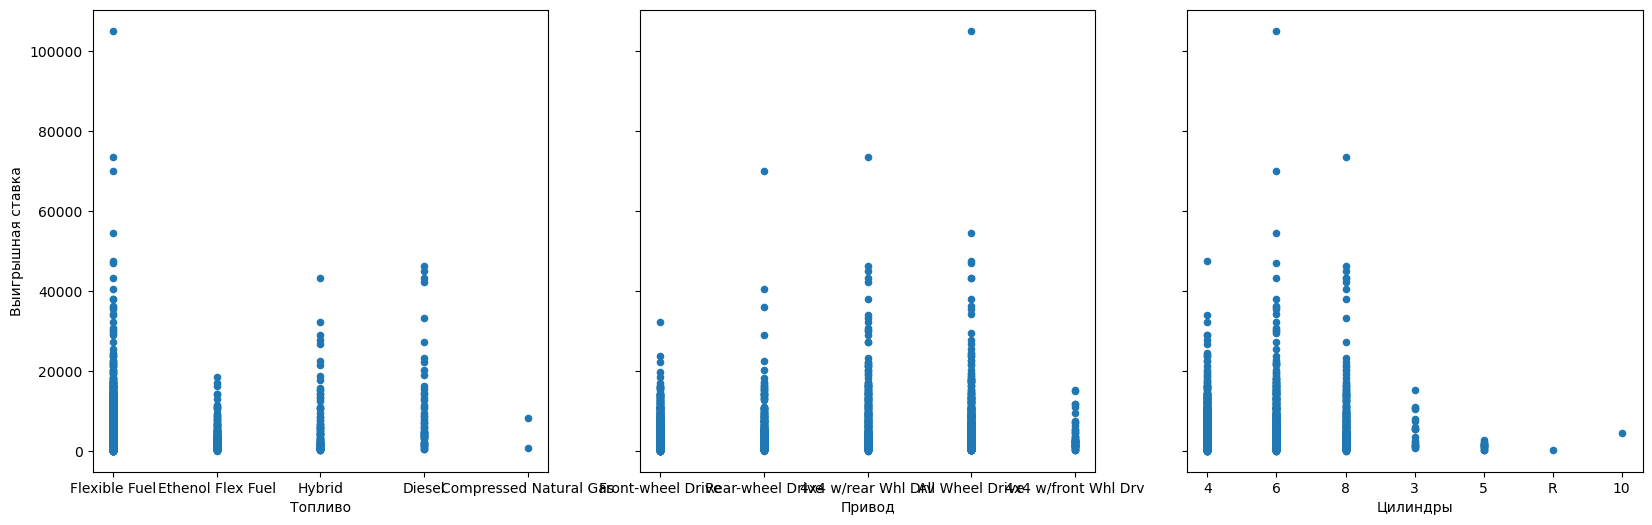

In [510]:
var_analysis = np.array(['Топливо', 'Привод', 'Цилиндры'])
fig, axs = plt.subplots(1, 3, sharey=True)    
df.plot(kind='scatter', x=var_analysis[0], y=target, ax=axs[0], figsize=(20, 6))
df.plot(kind='scatter', x=var_analysis[1], y=target, ax=axs[1])
df.plot(kind='scatter', x=var_analysis[2], y=target, ax=axs[2])

<Axes: xlabel='Второстепенное повреждение', ylabel='Выигрышная ставка'>

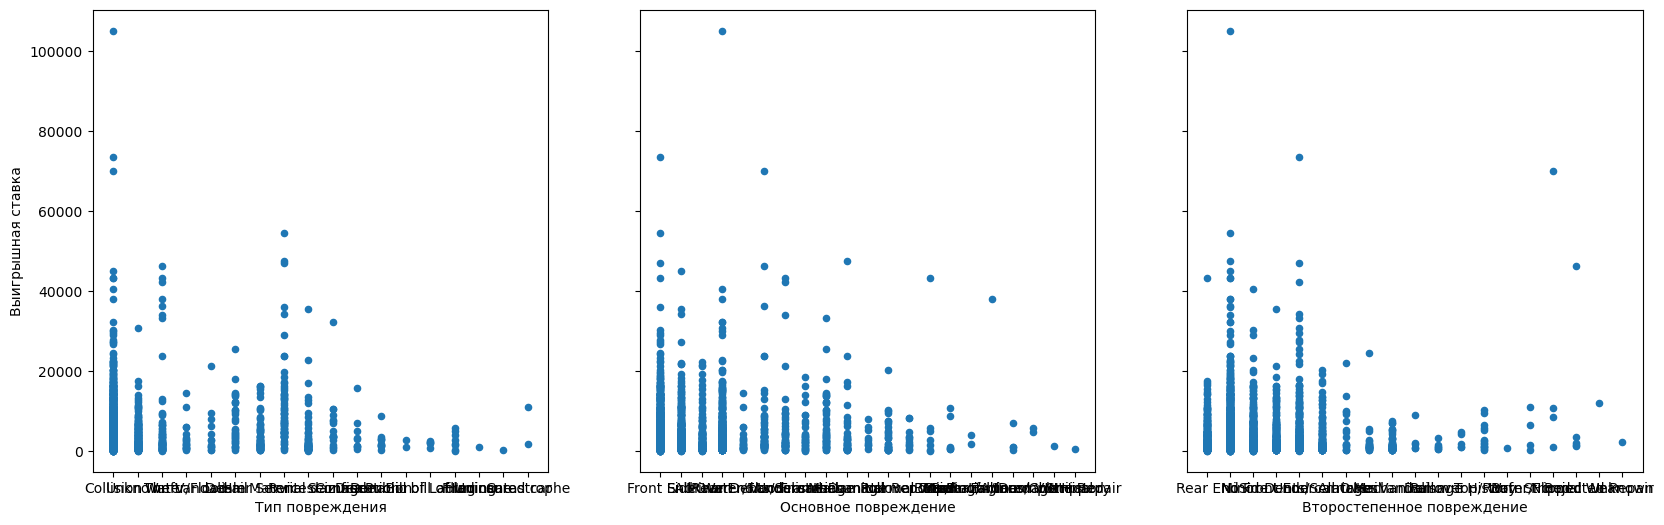

In [511]:
var_analysis = np.array(['Тип повреждения', 'Основное повреждение', 'Второстепенное повреждение'])
fig, axs = plt.subplots(1, 3, sharey=True)    
df.plot(kind='scatter', x=var_analysis[0], y=target, ax=axs[0], figsize=(20, 6))
df.plot(kind='scatter', x=var_analysis[1], y=target, ax=axs[1])
df.plot(kind='scatter', x=var_analysis[2], y=target, ax=axs[2])

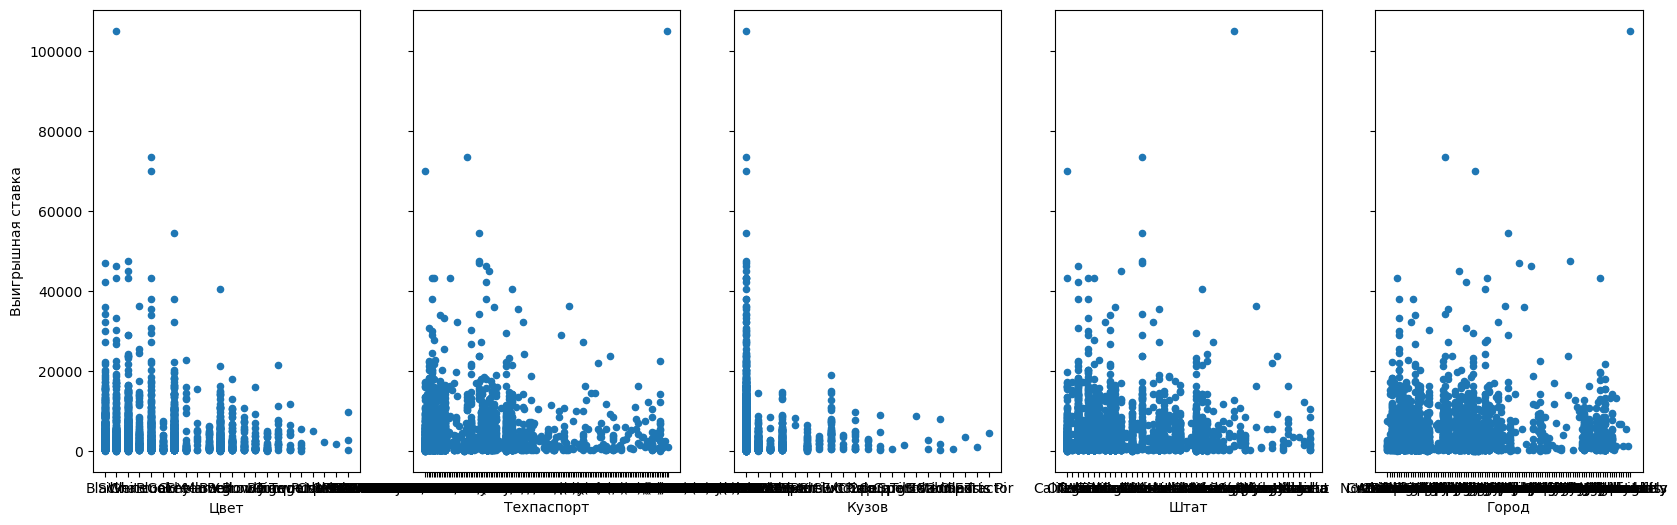

In [512]:
var_analysis = np.array(['Цвет', 'Техпаспорт', 'Кузов', 'Штат', 'Город'])
fig, axs = plt.subplots(1, var_analysis.shape[0], sharey=True, figsize=(20, 6))    
for i in range(var_analysis.shape[0]):
    df.plot(kind='scatter', x=var_analysis[i], y=target, ax=axs[i])

In [124]:
#Зависимость чистки и ключей
df['Ключи'].corr(df['Чистка'])

-0.4102917034019825

In [72]:
df[df['Рыночная стоимость'] == 0]['Едет'].value_counts() #69% - машины, которые могут ехать

Едет
1    244
0    108
Name: count, dtype: int64

In [62]:
print(df[df['Едет'] == 1]['Чистка'].unique()) #автомобили, которые более всего работоспособны (едут), не чистят
print(df[df['Запуск двигателя'] == 1]['Чистка'].unique()) #автомобили, у которых запускается двигатель, не чистят

[0]
[0]


### Машины, которые могут ехать

In [143]:
df_new = df[df['Едет'] == 1]

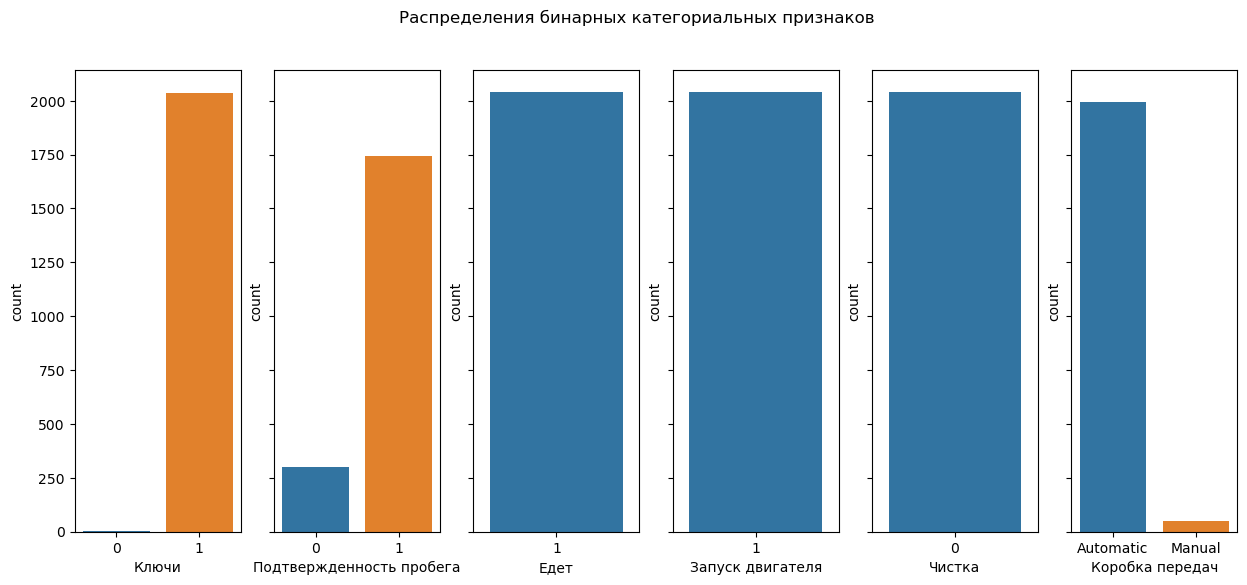

In [144]:
var_analysis = np.array(['Ключи', 'Подтвержденность пробега', 'Едет', 'Запуск двигателя', 'Чистка', 'Коробка передач'])
fig, axs = plt.subplots(1, var_analysis.shape[0], sharey=True, figsize=(15, 6))
for i in range(len(var_analysis)):
    sns.countplot(df_new, x = var_analysis[i], ax = axs[i])

fig.suptitle('Распределения бинарных категориальных признаков');

In [142]:
df[df['Едет'] == 1]['Ключи'].value_counts()

Ключи
1    2038
0       4
Name: count, dtype: int64

__Интересные факты:__
* Автомобили, у которых запускается двигатель, не чистят и не приводят в товарный вид. Также не чистят и автомобили, которые способны ехать
* Среди машин с нулевой рыночной стоимостью 69% - это те машины, которые работоспособны и могут ехать
* Отрицательная зависимость наличия ключей и проведения чистки: если ключи есть, чистку проводят в 11% случаях; когда ключей нет, чистку проводят в 77% случаях
* У машин, которые способны ехать, в основном имеются в наличии ключи. Отсутствие ключей в основном приходится на машины, которые не способны ехать
* Среди машин, которые могут ехать, встречаются те, которые имеют нулевую рыночную стоимость

__Небольшое summary:__ Если машина способна ехать, у нее, во-первых, имеются ключи, во-вторых, в ней скорее всего не проведена чистка. Если машина не может ехать, то в ней скорее всего проведена чистка

In [229]:
#повреждений передней части, когда причина - автомобильная авария
df[df['Тип повреждения'] == 'Collision']['Основное повреждение'].value_counts()['Front End'] / np.sum(df[df['Тип повреждения'] == 'Collision']['Основное повреждение'].value_counts())

0.6001834021091242

In [233]:
#повреждений передней части, когда причина - не автомобильная авария
df[df['Тип повреждения'] != 'Collision']['Основное повреждение'].value_counts()['Front End'] / np.sum(df[df['Тип повреждения'] != 'Collision']['Основное повреждение'].value_counts())

0.4433497536945813

In [237]:
print('Доля машин без второстепенного повреждения')
print(df['Второстепенное повреждение'].value_counts()['No'] / np.sum(df['Второстепенное повреждение'].value_counts()))

Доля машин без второстепенного повреждения
0.5161290322580645


In [235]:
print('Доля машин из автомобильной аварии с второстепенным повреждением')
print(df[df['Тип повреждения'] == 'Collision']['Второстепенное повреждение'].value_counts()['No'] / np.sum(df[df['Тип повреждения'] == 'Collision']['Второстепенное повреждение'].value_counts()))
print('Доля машин не из автомобильной аварии с второстепенным повреждением')
print(df[df['Тип повреждения'] != 'Collision']['Второстепенное повреждение'].value_counts()['No'] / np.sum(df[df['Тип повреждения'] != 'Collision']['Второстепенное повреждение'].value_counts()))

Доля машин из автомобильной аварии с второстепенным повреждением
0.5025217790004585
Доля машин не из автомобильной аварии с второстепенным повреждением
0.5648604269293924


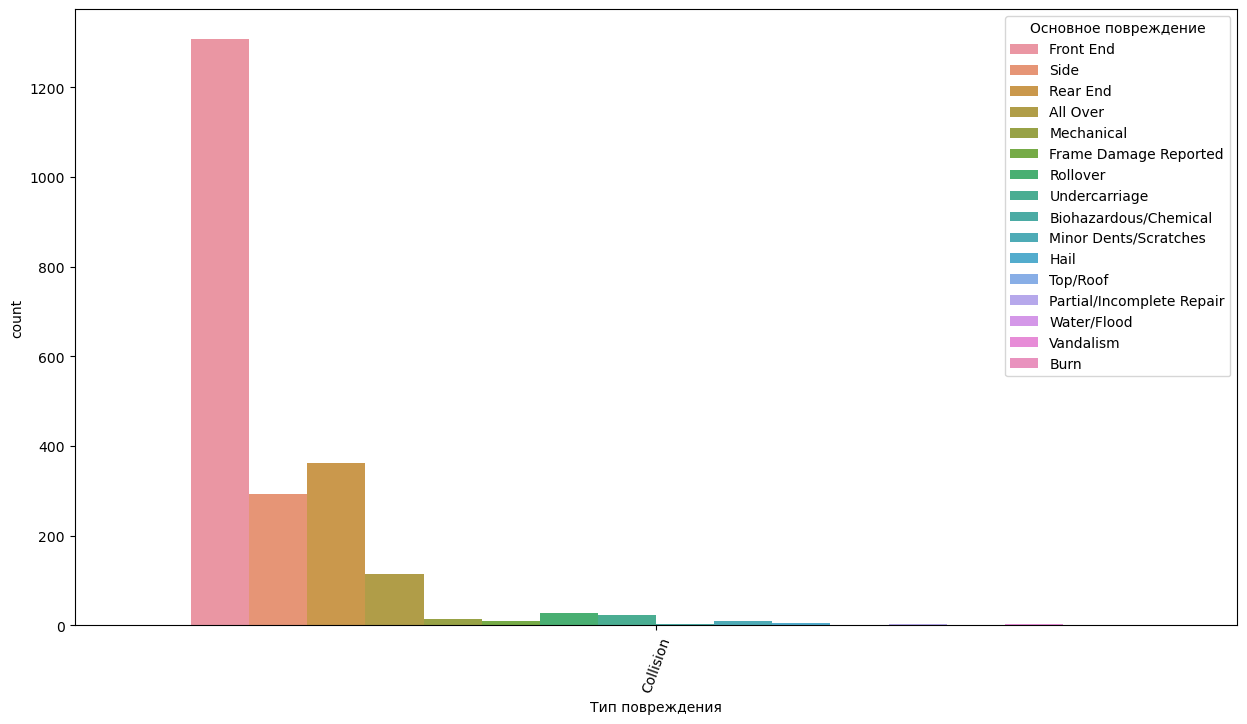

In [265]:
plt.figure(figsize = (15, 8))
sns.countplot(df[(df['Тип повреждения'] == 'Collision') ], x = 'Тип повреждения', hue = 'Основное повреждение')
plt.xticks(rotation = 70);

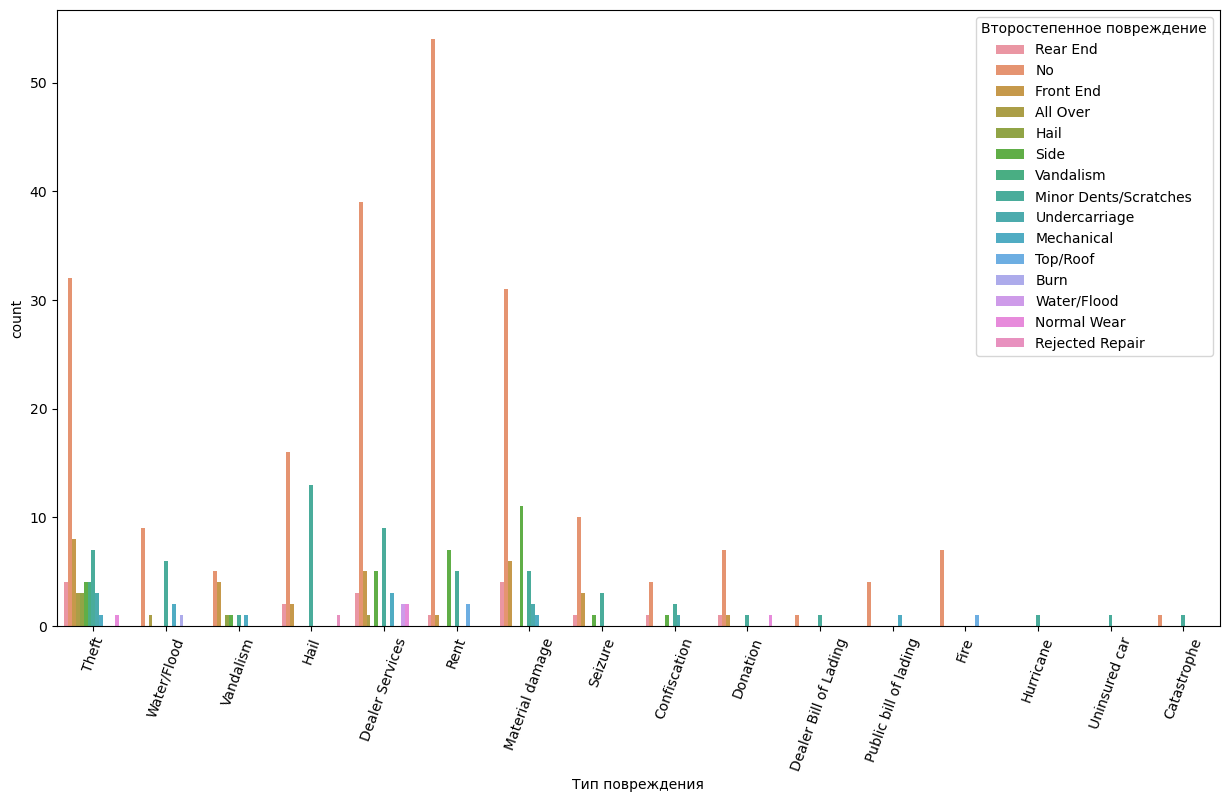

In [242]:
plt.figure(figsize = (15, 8))
sns.countplot(df[(df['Тип повреждения'] != 'Collision') * (df['Тип повреждения'] != 'Unknown')], x = 'Тип повреждения', hue = 'Второстепенное повреждение')
plt.xticks(rotation = 70);

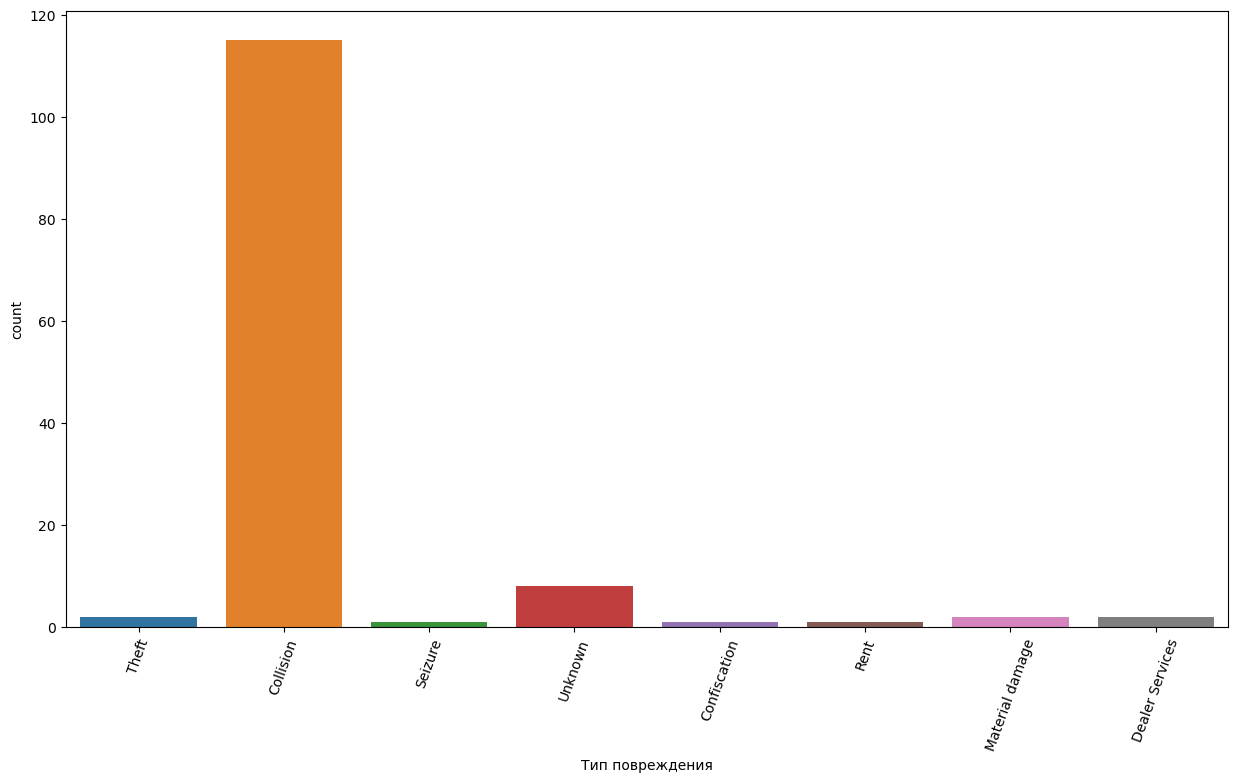

In [262]:
plt.figure(figsize = (15, 8))
sns.countplot(df[df['Основное повреждение'] == 'All Over'], x = 'Тип повреждения')
plt.xticks(rotation = 70);

__Другие факты:__
* Большинство причин повреждений - автомобильные аварии, при этом в 60% случаев повреждается передняя часть. Если причина повреждения другая, то передняя часть повреждается в 44% случаев. 
* В целом, второстепенное повреждение имеют около 50% машин, при этом наличие второстепенного повреждения не зависит от того, автомобильная это авария или нет
* Чаще всего в автомобильных авариях первостепенное повреждение приходится на перед, второстепенное - на заднюю часть
* Повсеместные повреждения распространены в таких типах аварий, как автомобильные авария, кража, изъятия, конфискация, аренда и дилерские услуги. Чаще всего они встречаются в автомобильных авариях

__Общие характеристики аукциона:__
* В большинстве случае продавцы продают машины вместе с ключами. В случае, если это не автомобильная авария, тогда в таких случаях преобладают повреждения "вандализм" и повреждения передней части
* В большинстве случае пробег подтвержден, зависимости его подтвержденности с типом повреждения нет. Чаще всего пробег подтверждается при наличии ключей
* Распространены машины с передним приводом, 4 цилиндрами, автоматической коробкой передач . Так распространены те машины, которые используют бензин
* В основном продают машины, которые могут ехать

# Планы

Примерные гипотезы, которые хотим проверить:
* Гипотезу о том, что цена продажи зависит от дня недели, а конкретнее от того будний день или выходной. Для этого нам нужно будет допарсить еще данных по разным дням.
* Гипотезу о том, что разница средних/медиан продажи автомобилей, которые едут и которые не едут или тех, у которых заводится двигатель, и тех, у которых не заводится, - статистически незначимо. Если гипотеза не опровергается, то можно будет предположить, что вероятно большинство автомобилей аукциона Copart приобретаются для запчастей, а не для восстановления, так как покупателю не важно, насколько легко восстановить автомобиль.
* Гипотеза на основе взаимосвязи признаков - не таргетов

Машинное обучение: 
* Планируется построить линейную модель для предсказания выигрышной ставки